# **Importamos librerias**

In [7]:
##LIBRERIAS
import seaborn as sns ##Librería para realizar mapa de calor o pairplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras import layers,models,optimizers

from sklearn.model_selection import KFold#es una clase de Scikit-learn que divide el conjunto de datos en subconjuntos para realizar validación cruzada.
from sklearn.model_selection import cross_val_score#es una función de Scikit-learn que calcula la precisión de un modelo mediante validación cruzada.
from sklearn.model_selection import train_test_split # Particion del conjunto de datos(entrenamiento y prueba)

##AHORA PARA HACER EL PREPROCESO LA REGRESION
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

# **Importamos la base de datos**

In [8]:
df = pd.read_csv('/kaggle/input/housing-housing/housing_fa62d090-9515-4031-a808-cfee2b6ae8cd (1).data',header=None, sep='\s+') ## 'header=None' es para que asuma que no hay un encabezado y lo que generar encabezados genéricos (1, 2, ..., n)
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] ## Insertamos un arreglo de columnas para los encabezados que estaban genéricos
df.head() ## Muesta las primeras 4 o 5 columnas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
#sns.set(style="whitegrid", context='notebook') ##Pair plot --> estipula relaciones entre variables de la base de datos 
#cols=['DIS','INDUS','CRIM','RM','MEDV']
#sns.pairplot(df[cols],height=2.5)
#plt.show()

cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# **Observamos el mapa de calor de la realción entre variables**

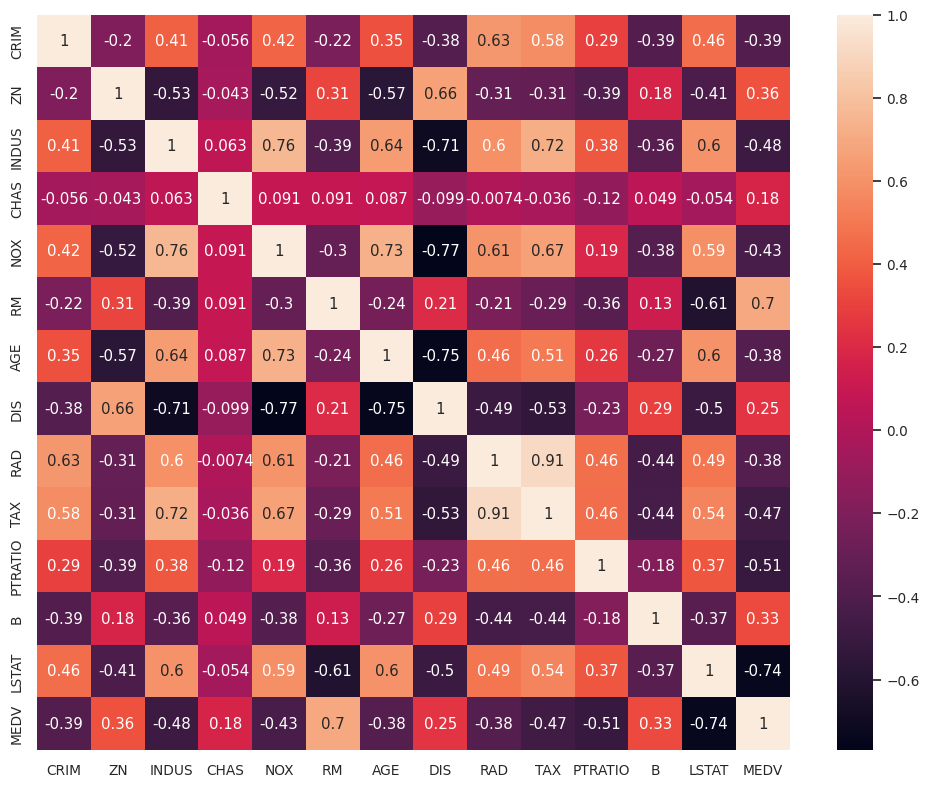

In [10]:
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=.9)


fig = plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols,xticklabels=cols)

fig.tight_layout()

# **Normalizamos todos los valores**

In [11]:
x=df['RM'].values.reshape(-1,1) ##El reshape es para que se ajuste a la forma en que la librería entiende
y=df['MEDV'].values.reshape(-1,1)


sc_x=StandardScaler() ##Para normalizar los datos (estén en una escala específica)
sc_y=StandardScaler()

x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y)

# **REGRESIÓN LINEAL**

In [12]:
##LINEAR REGRESSION
slr=LinearRegression()
slr.fit(x_std,y_std)

LinearRegression()

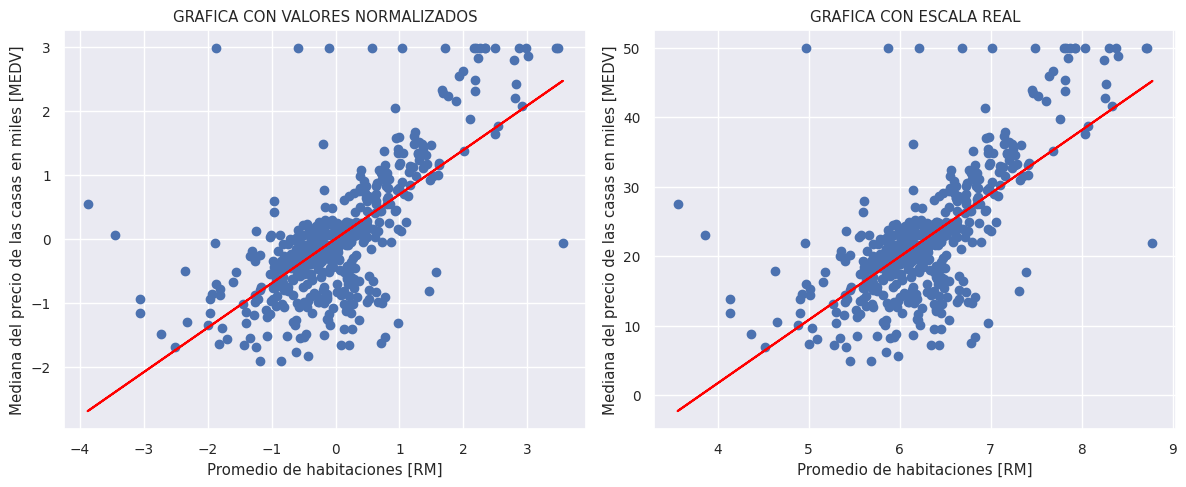

In [13]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x_std, y_std)
plt.plot(x_std, slr.predict(x_std),color='Red')
plt.title(r'GRAFICA CON VALORES NORMALIZADOS')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

plt.subplot(1,2,2)
plt.scatter(sc_x.inverse_transform(x_std), sc_y.inverse_transform(y_std))
plt.plot(sc_x.inverse_transform(x_std), sc_y.inverse_transform(slr.predict(x_std)),color='Red')
plt.title(r'GRAFICA CON ESCALA REAL')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

fig.tight_layout()

In [14]:
num_habitaciones=6
numb_habitaciones_std=sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 5 habitaciones en boston es de ",sc_y.inverse_transform(slr.predict(numb_habitaciones_std)))

El precio de una casa con 5 habitaciones en boston es de  [[19.94203311]]


# **RED NEURONAL CON KERAS**

# **Creamos la estructura de la red**

In [15]:
model=models.Sequential() #Sequential quiere decir que es una capa que está conectada con la siguiente
model.add(layers.Dense(2,input_shape=((1,))))   #Dense quiere decir que están conectadas todas con todas. 
                                                #Se indica que va a tener 4 neuronas.
                                                #activation es la función de activación
                                                #Input shape - se idica que se va a enviar un solo dato de toda la cadena de datos
model.add(layers.Dense(2)) #Para esta no se indica el shape ya que es densa, está conectada si o si con la entrada. En conclusión, si es densa, solamente se define el shape en la capa inicial
model.add(layers.Dense(1))     

model.summary() #Especifica como está estruturando la red

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# **Escogemos la variable a estimar y con respecto a cual**

In [16]:
#cols=['ZN','CHAS', 'RM', 'DIS', 'B']
cols=['RM']
df[cols].describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


In [17]:
data_x=df[cols].values##El reshape es para que se ajuste a la forma en que la librería entiende
data_y=df['MEDV'].values


scaler=StandardScaler() ##Para normalizar los datos (estén en una escala específica)

x_std=scaler.fit_transform(data_x)
y_std=data_y

# **Separamos los datos, unos para aprendizaje y otros para entreno**

In [18]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1,shuffle=0)

# **Compilamos y ejecutamos el modelo**

In [19]:
#Compila el modelo (lo construye)
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),loss="mse",metrics=["mae"])  #lr es el coeficiente de aprendizaje (cada cuanto evalúa)

#Ahora para entrenar el modelo
history = model.fit(X_train, y_train,epochs=200,verbose=0) #epochs es cuántas veces va a evaluar
                                                                                 # verbose es para imprimir lo que va realizando

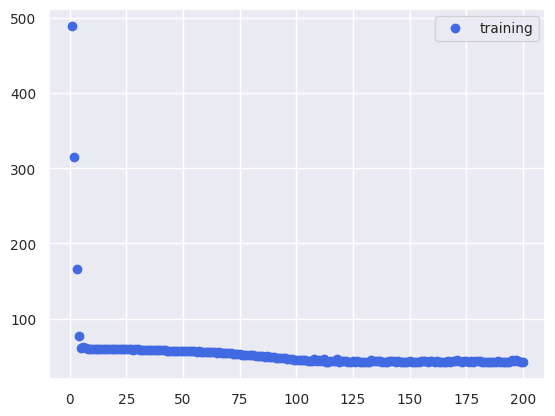

In [20]:
import matplotlib.pyplot as plt
loss_values=history.history["loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training",color="royalblue")
plt.legend()
plt.show()

In [21]:
prueba=model.predict([X_test])

2/2 [==============================] - 0s 4ms/step


In [22]:
prom_error=0
for i in range(0,len(X_test)-1): #len(X_test)-1
    prom_error+=abs(((y_test[i]-prueba[i])/y_test[i])*100)
    print(X_test[i],"-->\t",prueba[i],"\t---\t",y_test[i],"\t",abs(((y_test[i]-prueba[i])/y_test[i])*100),"%")
print("ERROR PROMERIO= ",prom_error/len(X_test),"%")

[6.968] -->	 [29.294477] 	---	 35.4 	 [17.247242] %
[5.713] -->	 [17.659126] 	---	 20.1 	 [12.143652] %
[7.274] -->	 [32.131466] 	---	 34.6 	 [7.1344876] %
[6.63] -->	 [26.160818] 	---	 27.9 	 [6.2336254] %
[5.569] -->	 [16.324076] 	---	 17.5 	 [6.719568] %
[5.854] -->	 [18.966364] 	---	 22.7 	 [16.447739] %
[6.251] -->	 [22.64703] 	---	 19.9 	 [13.804172] %
[5.852] -->	 [18.947828] 	---	 6.3 	 [200.75917] %
[6.395] -->	 [23.982084] 	---	 21.7 	 [10.516513] %
[5.39] -->	 [14.664531] 	---	 11.5 	 [27.517658] %
[5.888] -->	 [19.281588] 	---	 23.3 	 [17.246403] %
[5.787] -->	 [18.345198] 	---	 19.4 	 [5.4371233] %
[6.302] -->	 [23.119865] 	---	 24.8 	 [6.774733] %
[6.657] -->	 [26.41114] 	---	 17.2 	 [53.553135] %
[5.602] -->	 [16.63003] 	---	 19.4 	 [14.278195] %
[6.649] -->	 [26.33697] 	---	 13.9 	 [89.47461] %
[6.511] -->	 [25.05754] 	---	 25.0 	 [0.23016357] %
[5.85] -->	 [18.929281] 	---	 21.0 	 [9.860565] %
[5.986] -->	 [20.190166] 	---	 21.4 	 [5.653426] %
[4.628] -->	 [7.5998783] 

## RED NEURONAL SIN KERAS

## Función de inicialización de parámetros

In [23]:
#layer_dims =[2, 2, 1]

def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [24]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

# Función de pérdida

In [25]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

# Función de entrenamiento

In [26]:
##layer_dims =[2, 2, 1]
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
    
    #print("A0=",params['A0'].shape)
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    #print("A1=",params['A1'].shape)
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
    
    #print("A2=",params['A2'].shape)
  
    output = params['Z2']
    #print(output)
    
    if training:
    # Backpropagation
    
        params['dZ2'] = mse(y_train,output,True) # 506x1
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2']) # 2x506*506x1 = 2x1
        
        #print("dZ2=",params['dZ2'].shape)
        #print("dW2=",params['dW2'].shape)
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) # 506x1*1x2 = 506x2
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1']) # 2x506*506x2 = 2x2
        
        #print("dZ1=",params['dZ1'].shape)
        #print("dW1=",params['dW1'].shape)

        
        ## Gradinet Descent:

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

    
    return output

In [27]:
#print("W1=",params['W1'].shape,"   b1=",params['b1'].shape)
#print("W2=",params['W2'].shape,"   b2=",params['b2'].shape)
#print("X= ",X.shape)

# Entrenando la red

In [28]:
cols=['RM','ZN']
X=df[cols].values
#X=np.array(X)
#norm_X = np.linalg.norm(X)

#X = ((X / norm_X)*2)-1

Y=df['MEDV'].values.reshape(-1,1)
#Y=Y[:,np.newaxis]
#norm_Y = np.linalg.norm(Y)

#Y = ((Y / norm_Y)*2)-1

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

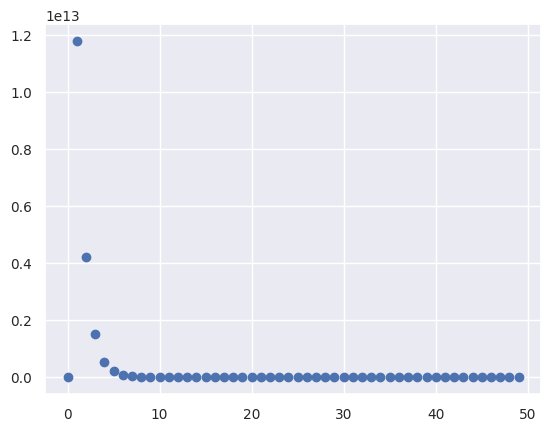

In [30]:
layer_dims =[2, 2, 1]

params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(500):
    output = train(X_train,0.05,params)
    if _ % 10 == 0:
        errors.append(mse(y_train,output))
        #print("---------------",mse(y_train,output))

plt.plot(errors,"o")    

# **Testeamos la red**

Llegamos a la conclusión que algunos porcentajes de error dan algo altos ya que en los datos de aprendizaje no habían valores que estuvieran cercanos a estos. Puede solucionarse agregando más datos en la etapa de aprendizaje, pero trabajamos con los que teníamos disponibles por el momento.

In [31]:
prueba_dos = train(X_test,0.01,params,training=False)

for i in range(0,len(X_test)-1): #len(X_test)-1
    prom_error+=abs(((y_test[i]-prueba_dos[i])/y_test[i])*100)
    print(X_test[i],"-->\t",prueba_dos[i],"\t---\t",y_test[i],"\t",abs(((y_test[i]-prueba_dos[i])/y_test[i])*100),"%")
print("ERROR PROMERIO= ",prom_error/len(X_test),"%")

[ 7.274 80.   ] -->	 [22.51248577] 	---	 [34.6] 	 [34.93501221] %
[ 7.42 33.  ] -->	 [22.51248577] 	---	 [33.4] 	 [32.59734798] %
[5.869 0.   ] -->	 [22.51248577] 	---	 [19.5] 	 [15.448645] %
[8.337 0.   ] -->	 [22.51248577] 	---	 [41.7] 	 [46.01322356] %
[6.376 0.   ] -->	 [22.51248577] 	---	 [17.7] 	 [27.18918517] %
[6.781 0.   ] -->	 [22.51248577] 	---	 [26.5] 	 [15.04722349] %
[ 6.616 33.   ] -->	 [22.51248577] 	---	 [28.4] 	 [20.73068389] %
[5.683 0.   ] -->	 [22.51248577] 	---	 [5.] 	 [350.24971549] %
[ 6.842 20.   ] -->	 [22.51248577] 	---	 [30.1] 	 [25.20768846] %
[6.223 0.   ] -->	 [22.51248577] 	---	 [10.2] 	 [120.71064485] %
[6.245 0.   ] -->	 [22.51248577] 	---	 [23.4] 	 [3.79279584] %
[6.229 0.   ] -->	 [22.51248577] 	---	 [19.4] 	 [16.04374111] %
[6.144 0.   ] -->	 [22.51248577] 	---	 [19.8] 	 [13.6994231] %
[5.727 0.   ] -->	 [22.51248577] 	---	 [18.2] 	 [23.69497678] %
[5.887 0.   ] -->	 [22.51248577] 	---	 [12.7] 	 [77.26366752] %
[6.343 0.   ] -->	 [22.51248577] 	---	